In [70]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Split train data

In [5]:
df = pd.DataFrame.from_csv('train.csv')

In [6]:
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
Id,,,,,,,,,,,,,,,,,,,,,
1,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
2,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
3,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
4,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
5,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [27]:
print(len(df.columns))
df.columns

55


Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40

In [11]:
num_valid = int(len(df) * 0.2)
num_train = len(df) - num_valid
num_valid, num_train

(3024, 12096)

In [12]:
train_df = df[:num_train]
valid_df = df[num_train:num_train+num_valid]

In [13]:
len(valid_df), len(train_df)

(3024, 12096)

In [14]:
valid_df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
Id,,,,,,,,,,,,,,,,,,,,,
12097,2728,97,20,162,49,283,248,206,77,524,...,0,0,0,0,0,0,0,0,0,5
12098,2875,90,8,108,-2,930,232,228,129,2132,...,0,1,0,0,0,0,0,0,0,1
12099,2848,107,21,95,35,930,250,210,77,2130,...,0,1,0,0,0,0,0,0,0,2
12100,2817,39,21,212,61,1423,216,190,101,1507,...,0,0,0,0,0,0,0,0,0,2
12101,2739,335,17,67,13,1614,179,215,173,1622,...,0,0,0,0,0,0,0,0,0,6


In [15]:
train_df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
Id,,,,,,,,,,,,,,,,,,,,,
1,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
2,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
3,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
4,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
5,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [17]:
valid_df.to_csv('valid.csv')
train_df.to_csv('train.csv')

# Visualize

In [25]:
% matplotlib inline

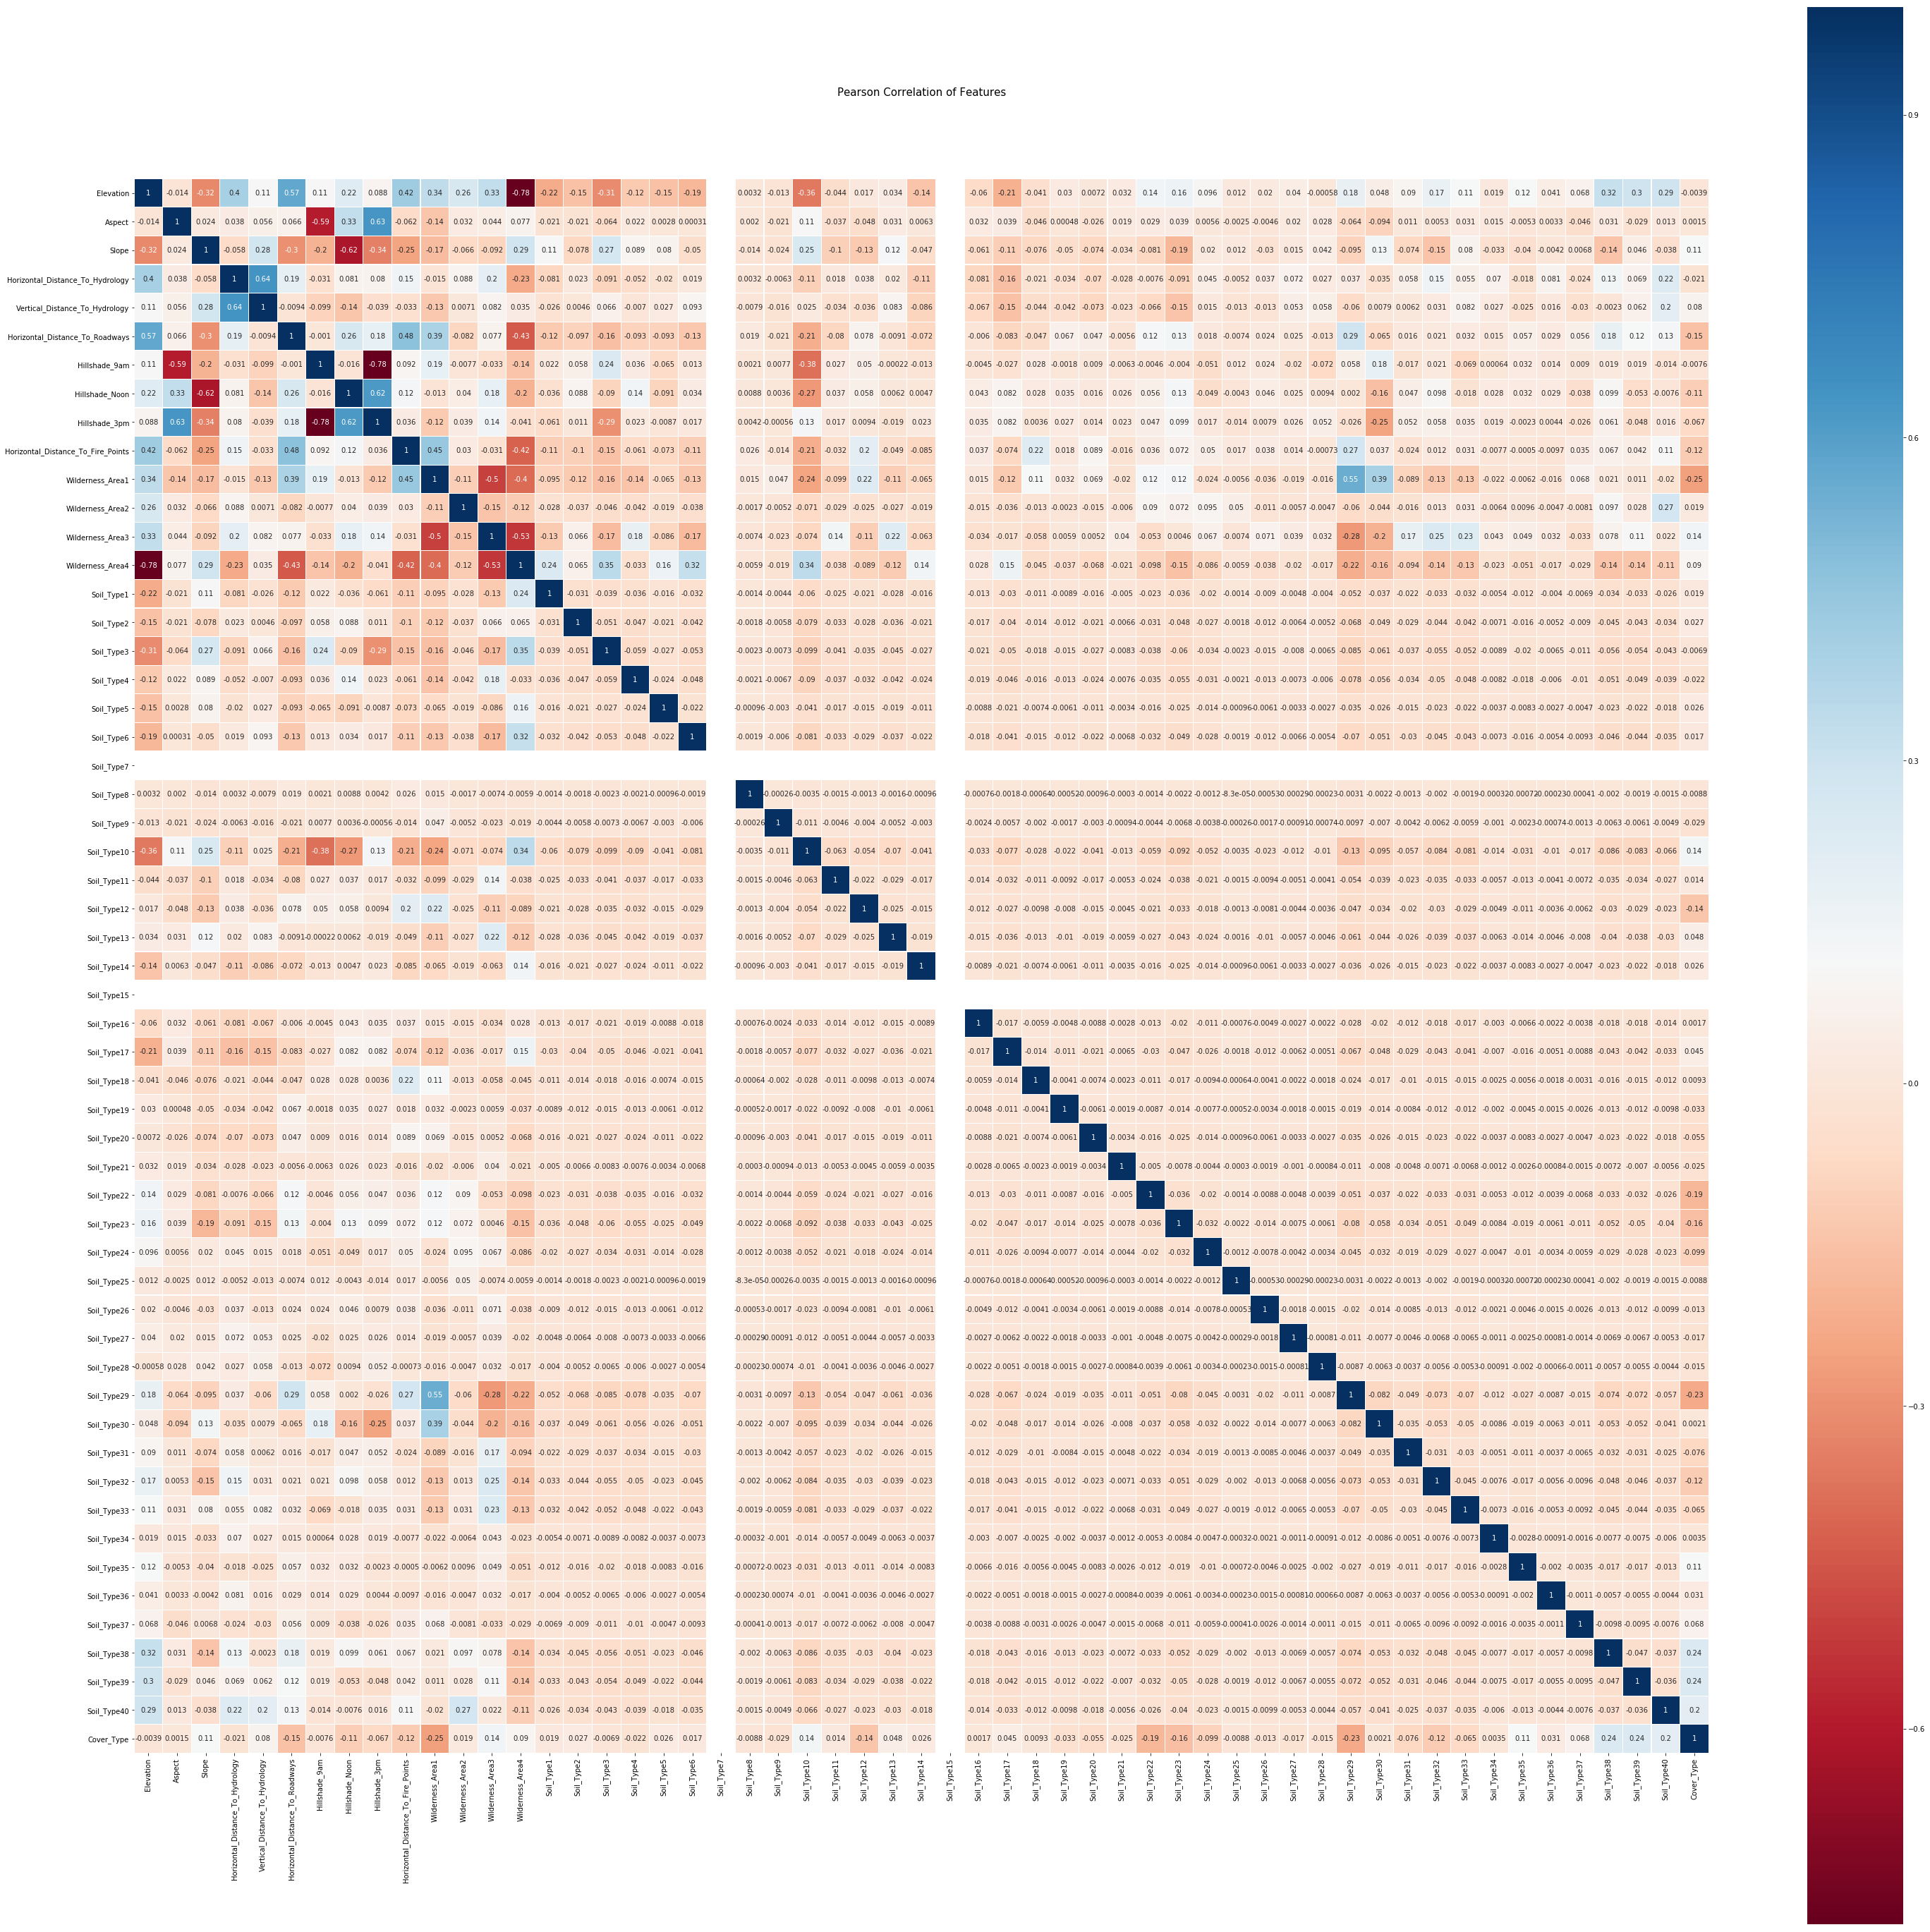

In [30]:
colormap = plt.cm.RdBu
plt.figure(figsize=(50,50))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(train_df.astype(float).corr(), linewidths=0.1, vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

Too many features  
Is it possible to reduce `Soil_Type`?  
Can a single row take on multiple soil types?

In [49]:
soil_type1 = train_df.index[train_df['Soil_Type1']==1].tolist()
soil_type2 = train_df.index[train_df['Soil_Type2']==1].tolist()

_equiv = []

for st1 in soil_type1:
    if st1 in soil_type2:
        _equiv.append(st1)
        
print(_equiv)

[]


In [58]:
soil_cols = [c for c in train_df.columns if c.startswith('Soil')]
train_df.index[train_df[soil_cols].sum(axis=1) != 1]

Int64Index([], dtype='int64', name='Id')

Each row takes on only 1 soil type  
Get soil column name of row that is set to 1

Get distribution of soil types for later verification

In [80]:
train_df[soil_cols].sum(axis=0)

Soil_Type1      279
Soil_Type2      477
Soil_Type3      727
Soil_Type4      615
Soil_Type5      132
Soil_Type6      503
Soil_Type7        0
Soil_Type8        1
Soil_Type9       10
Soil_Type10    1595
Soil_Type11     304
Soil_Type12     227
Soil_Type13     379
Soil_Type14     133
Soil_Type15       0
Soil_Type16      85
Soil_Type17     454
Soil_Type18      60
Soil_Type19      40
Soil_Type20     132
Soil_Type21      13
Soil_Type22     272
Soil_Type23     645
Soil_Type24     210
Soil_Type25       1
Soil_Type26      41
Soil_Type27      12
Soil_Type28       8
Soil_Type29    1239
Soil_Type30     675
Soil_Type31     250
Soil_Type32     540
Soil_Type33     496
Soil_Type34      15
Soil_Type35      75
Soil_Type36       8
Soil_Type37      24
Soil_Type38     558
Soil_Type39     523
Soil_Type40     338
dtype: int64

In [84]:
soil_type_df = pd.DataFrame(columns=['soil_type'])

for i, row in train_df[soil_cols].iterrows():
    regex = re.search('.+?(\d{1,2})', row[row==1].index[0])
    soil_type = int(regex.group(1))
    soil_type_df.loc[i] = soil_type

In [91]:
soil_type_df.head()

,soil_type
1,29
2,29
3,12
4,30
5,29


In [99]:
soil_type_df.apply(pd.value_counts).sort_index()

,soil_type
1,279
2,477
3,727
4,615
5,132
6,503
8,1
9,10
10,1595
11,304


In [100]:
train_df_copy = train_df.copy()

In [101]:
train_df_copy['soil_type'] = soil_type_df

In [102]:
train_df_copy

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type,soil_type
Id,,,,,,,,,,,,,,,,,,,,,
1,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,5,29
2,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,5,29
3,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,2,12
4,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,2,30
5,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,5,29
6,2579,132,6,300,-15,67,230,237,140,6031,...,0,0,0,0,0,0,0,0,2,29
7,2606,45,7,270,5,633,222,225,138,6256,...,0,0,0,0,0,0,0,0,5,29
8,2605,49,4,234,7,573,222,230,144,6228,...,0,0,0,0,0,0,0,0,5,29
9,2617,45,9,240,56,666,223,221,133,6244,...,0,0,0,0,0,0,0,0,5,29


In [ ]:
train_df_copy = train_df_copy.drop(soil_cols, axis=1)

In [110]:
train_df_copy.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Cover_Type,soil_type
Id,,,,,,,,,,,,,,,,
1,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,5,29
2,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,5,29
3,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,2,12
4,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,2,30
5,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,5,29


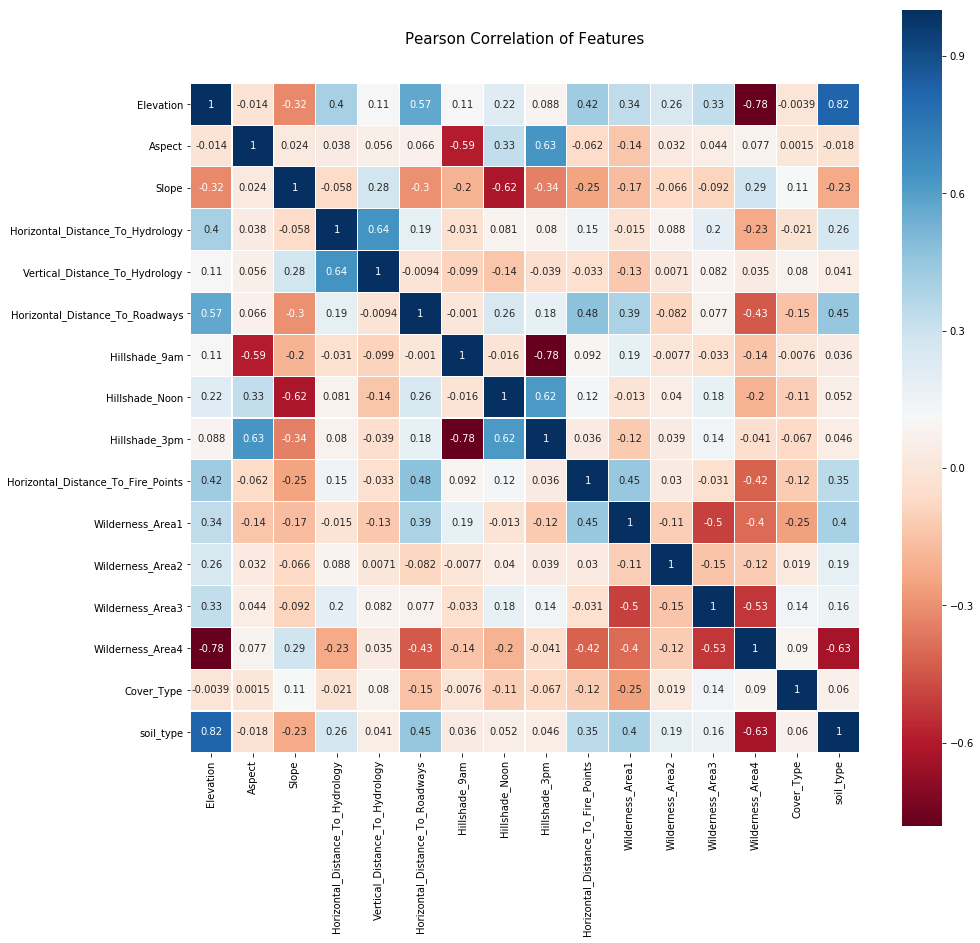

In [115]:
colormap = plt.cm.RdBu
plt.figure(figsize=(15,15))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(train_df_copy.astype(float).corr(), linewidths=0.1, vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

Can `Wilderness_AreaN` also be collapsed?

In [119]:
wilderness_cols = [c for c in train_df.columns if c.startswith('Wilderness_Area')]
train_df.index[train_df[wilderness_cols].sum(axis=1) != 1]

Int64Index([], dtype='int64', name='Id')

Each row can only take on one wilderness area

Get distribution of wilderness types for later verification

In [123]:
train_df[wilderness_cols].sum(axis=0)

Wilderness_Area1    3326
Wilderness_Area2     386
Wilderness_Area3    4837
Wilderness_Area4    3547
dtype: int64

Aggregate wilderness area

In [124]:
wilderness_area_df = pd.DataFrame(columns=['wilderness_area'])

for i, row in train_df[wilderness_cols].iterrows():
    regex = re.search('.+?(\d{1,2})', row[row==1].index[0])
    wilderness_area = int(regex.group(1))
    wilderness_area_df.loc[i] = wilderness_area

In [125]:
wilderness_area_df.head()

,wilderness_area
1,1
2,1
3,1
4,1
5,1


In [127]:
wilderness_area_df.apply(pd.value_counts).sort_index()

,wilderness_area
1,3326
2,386
3,4837
4,3547


Distribution looks fine  
Now apply changes to `train_df_copy`

In [128]:
train_df_copy['wilderness_area'] = wilderness_area_df

In [132]:
# all rows returned by head() are all in area 1`
train_df_copy.tail()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Cover_Type,soil_type,wilderness_area
Id,,,,,,,,,,,,,,,,,
12092,2039,267,15,30,0,450,180,245,204,633,0,0,0,1,3,17,4
12093,2081,84,35,175,53,270,244,158,13,488,0,0,0,1,3,1,4
12094,1925,352,22,210,74,182,176,197,155,779,0,0,0,1,6,5,4
12095,2778,111,15,256,44,446,244,223,104,366,1,0,0,0,5,30,1
12096,2748,98,17,192,44,335,245,214,92,470,1,0,0,0,5,30,1


In [134]:
train_df_copy = train_df_copy.drop(wilderness_cols, axis=1)

In [135]:
train_df_copy.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Cover_Type,soil_type,wilderness_area
Id,,,,,,,,,,,,,
1,2596,51,3,258,0,510,221,232,148,6279,5,29,1
2,2590,56,2,212,-6,390,220,235,151,6225,5,29,1
3,2804,139,9,268,65,3180,234,238,135,6121,2,12,1
4,2785,155,18,242,118,3090,238,238,122,6211,2,30,1
5,2595,45,2,153,-1,391,220,234,150,6172,5,29,1


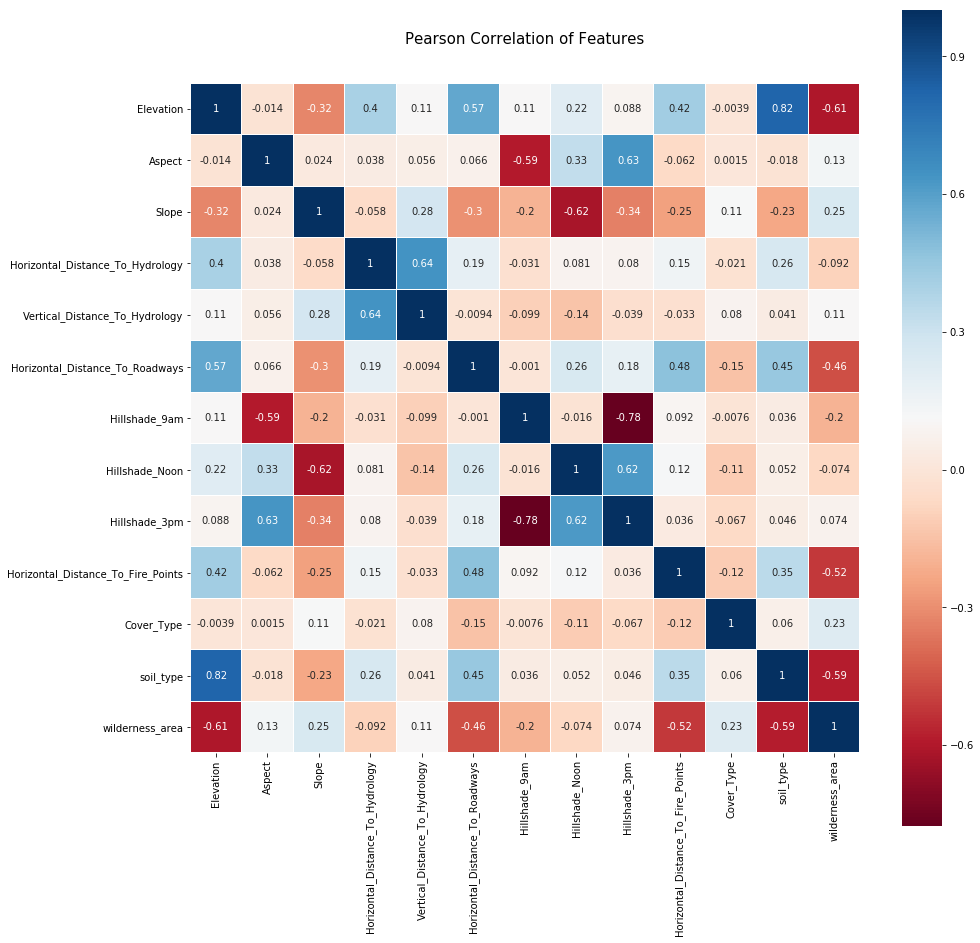

In [137]:
colormap = plt.cm.RdBu
plt.figure(figsize=(15,15))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(train_df_copy.astype(float).corr(), linewidths=0.1, vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

`Elevation` and `soil_type` have high positive correlation and therefore are redundant  
Should verify later that removing either feature has minimal impact on model performance  